## Some Exploratory Data Analysis


In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DATA_DIR = 'data'

edu_train_data = 'module_Education_train_set.csv'
edu_test_data = 'module_Education_test_set.csv'
house_train_data = 'module_HouseholdInfo_train_set.csv'
house_test_data = 'module_HouseholdInfo_test_set.csv'
pov_train_data = 'module_SubjectivePoverty_train_set.csv'

edu_train = pd.read_csv(os.path.join(DATA_DIR, edu_train_data))
edu_test = pd.read_csv(os.path.join(DATA_DIR, edu_test_data))
house_train = pd.read_csv(os.path.join(DATA_DIR, house_train_data))
house_test = pd.read_csv(os.path.join(DATA_DIR, house_test_data))
pov_train = pd.read_csv(os.path.join(DATA_DIR, pov_train_data))

### Let's start with Subjective Poverty first


(5337, 11)


/tmp/ipykernel_204088/3261758622.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(list(range(10)))


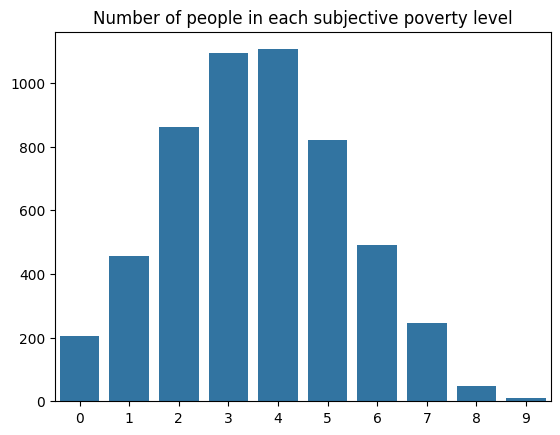

In [2]:
print(pov_train.shape)

# a very normal like distribution!
ax = sns.barplot(pov_train.iloc[:, 1:].sum(axis=0))
ax.set_xticklabels(list(range(10)))
plt.title('Number of people in each subjective poverty level')
plt.show()

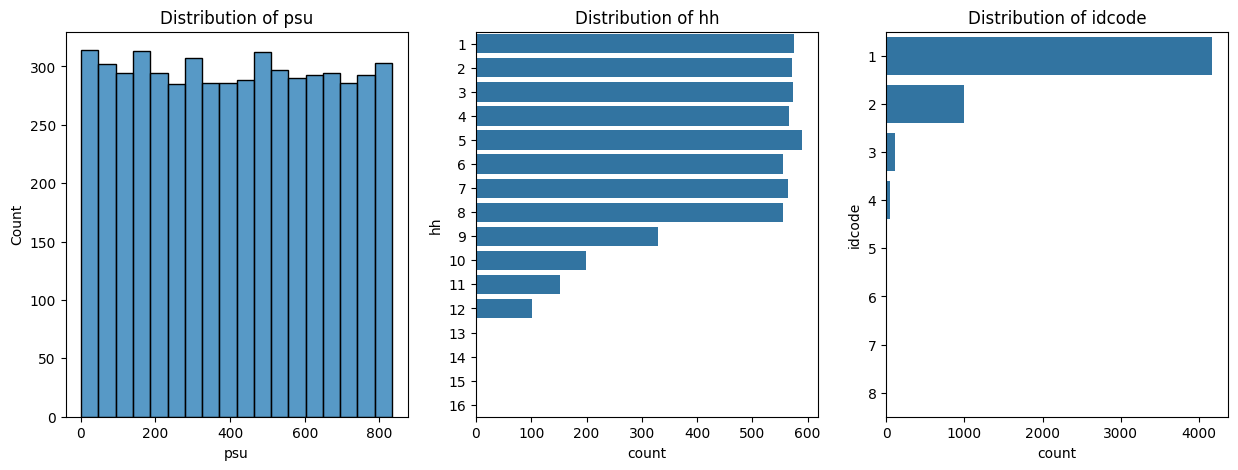

In [6]:
pov_train[['psu', 'hh', 'idcode']] = pov_train['psu_hh_idcode'].str.split('_', expand=True).astype(int)
# plot the distribution of psu, hh, and idcode
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(pov_train['psu'], ax=ax[0])
ax[0].set_title('Distribution of psu')
sns.countplot(pov_train['hh'].astype(str), ax=ax[1], order = list(range(1, 17)))
ax[1].set_title('Distribution of hh')
sns.countplot(pov_train['idcode'].astype(str), ax=ax[2], order=list(range(1, 9)))
ax[2].set_title('Distribution of idcode')
plt.show()

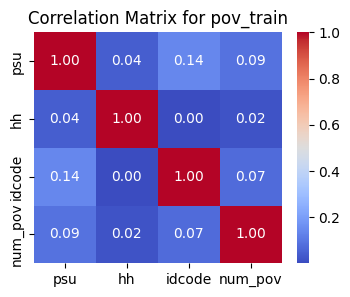

In [ ]:
# we might as well convert it to a range of 1-10
# I also tried with just the classes themselves, but not much difference in the correlation matrix
pov_train['num_pov'] = pov_train.iloc[:, 1:11].idxmax(axis=1).str.split('_').str[-1].astype(int)
# Calculate the correlation matrix
corr = pov_train[['psu', 'hh', 'idcode', 'num_pov']].corr()

# Generate a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for pov_train')
plt.show()